# Example: Credit Fraud Detector

Link: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
import pandas as pd
pd.set_option('display.max_column', 100)
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14, 10
import numpy as np
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Exploratory data analysis

In [4]:
data = pd.read_csv('data/creditcard.csv')

(284807, 31)

In [13]:
# Simple look

data.head()
data.shape
data.info()
data.columns
data.describe()
data['Class'].value_counts()
data.isnull().sum()
data.isnull().sum().max()
data.isnull().any()
data.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

False

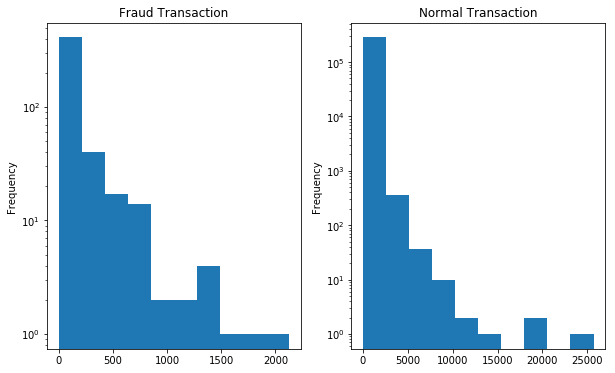

In [14]:
# Amount Histogram

Fraud_transaction = data[data["Class"] == 1]
Normal_transaction = data[data["Class"] == 0]

plt.figure(figsize = (10, 6))

plt.subplot(121)
Fraud_transaction.Amount.plot.hist(title = "Fraud Transaction")
plt.yscale('log')

plt.subplot(122)
Normal_transaction.Amount.plot.hist(title = "Normal Transaction")
plt.yscale('log')

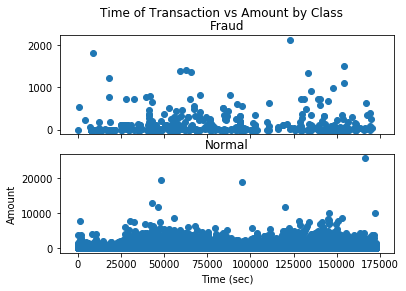

In [16]:
# Amount-Time

f, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
f.suptitle('Time of Transaction vs Amount by Class')

ax1.scatter(Fraud_transaction.Time, Fraud_transaction.Amount)
ax1.set_title('Fraud')

ax2.scatter(Normal_transaction.Time, Normal_transaction.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (sec)')
plt.ylabel('Amount')
plt.show()

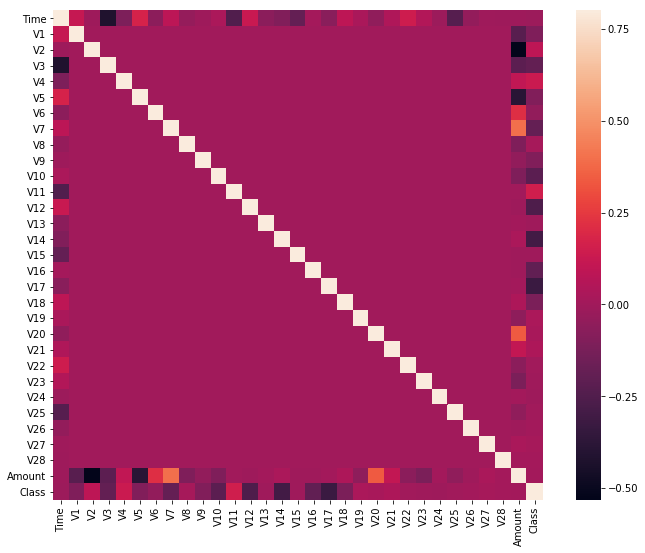

In [17]:
# Correlation

correlation_matrix = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(correlation_matrix, vmax = 0.8, square = True)
plt.show()

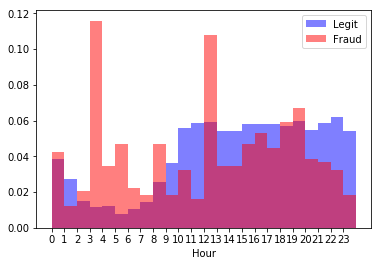

In [19]:
# After sampling

data['Hour'] = data['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)
data.pivot_table(values = 'Amount', index = 'Hour', columns = 'Class', aggfunc = 'count')

bins = np.arange(data['Hour'].min(), data['Hour'].max()+2)
sns.distplot(data[data['Class'] == 0.0]['Hour'],
            norm_hist = True,
            bins = bins,
            kde = False,
            color = 'b',
            hist_kws = {'alpha':0.5},
            label = 'Legit')
sns.distplot(data[data['Class'] == 1.0]['Hour'],
            norm_hist = True,
            bins = bins,
            kde = False,
            color = 'r',
            hist_kws = {'alpha':0.5},
            label = 'Fraud')
plt.xticks(range(0, 24))
plt.legend()

Text(0, 0.5, 'Frequency')

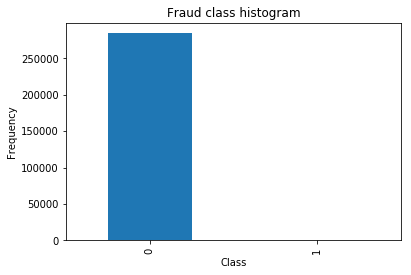

In [22]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel('Class')
plt.ylabel('Frequency')

In [21]:
# The data is highly skewed. 492 frauds in a total of 284,807 observations (0.172%).
# There is no missing value.
# The Time and Amount features are not transformed data.